In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def simulateDailyCost():
    # Weekday task time ranges
    weekdayTasks = {
        'studying': np.random.uniform(4, 8),
        'chores': np.random.uniform(2, 4),
        'exercise': np.random.uniform(2, 4),
        'netflix': np.random.uniform(4, 8)
    }

    # Weekend task time ranges
    weekendTasks = {
        'chores': np.random.uniform(4, 6),
        'exercise': np.random.uniform(2, 4),
        'netflix': np.random.uniform(6, 8)
    }

    # Fixed time tasks
    fixedTasks = {
        'sleep': 6,
        'personalCare': 2
    }

    # UBingeWeClean rates
    ubingeWeCleanRates = {
        'weekday': 3.14,
        'weekend': 6.45
    }

    # Calculate total time and cost for the day
    totalTime = sum(weekdayTasks.values()) + sum(weekendTasks.values()) + sum(fixedTasks.values())
    totalCost = (
        (ubingeWeCleanRates['weekday'] * (weekdayTasks['studying'] + weekdayTasks['chores'] + weekdayTasks['exercise'] + weekdayTasks['netflix'])) +
        (ubingeWeCleanRates['weekend'] * (weekendTasks['chores'] + weekendTasks['exercise'] + weekendTasks['netflix']))
    )

    return totalCost

In [13]:
def simulateWeeklyCost(numDaysPerWeek):

    weeklyCosts = [simulateDailyCost() for _ in range(numDaysPerWeek)]
    return np.mean(weeklyCosts)

In [14]:
def simulateMonthlyCost(numDaysPerWeek, numWeeksPerMonth):
    monthlyCosts = [simulateWeeklyCost(numDaysPerWeek) for _ in range(numWeeksPerMonth)]
    return np.mean(monthlyCosts)

In [15]:
def monteCarloSimulationDaily(numSimulations=1):
    dailyCosts = [simulateDailyCost() for _ in range(numSimulations)]
    return dailyCosts

In [16]:
def monteCarloSimulationWeekly(numSimulations=1, numDaysPerWeek=7):
    weeklyCosts = [simulateWeeklyCost(numDaysPerWeek) for _ in range(numSimulations)]
    return weeklyCosts


In [17]:
def monteCarloSimulationMonthly(numSimulations=1, numDaysPerWeek=7, numWeeksPerMonth=4):
    monthlyCosts = [simulateMonthlyCost(numDaysPerWeek, numWeeksPerMonth) for _ in range(numSimulations)]
    return monthlyCosts

In [18]:
def displayResultsWithPlots(meanDaily, stdDevDaily, meanWeekly, stdDevWeekly, meanMonthly, stdDevMonthly, dailyCosts, weeklyCosts, monthlyCosts):
    # Display results in the terminal
    print("Results:")
    print(f"Mean Daily Cost: ${meanDaily:.2f}, Std Dev: ${stdDevDaily:.2f}")
    print(f"Mean Weekly Cost: ${meanWeekly:.2f}, Std Dev: ${stdDevWeekly:.2f}")
    print(f"Mean Monthly Cost: ${meanMonthly:.2f}, Std Dev: ${stdDevMonthly:.2f}")

    # Display results in subplots
    plt.figure(figsize=(15, 5))

    # Subplot for Daily Cost Distribution
    plt.subplot(1, 3, 1)
    plt.hist(dailyCosts, bins=20, color='blue', edgecolor='black')
    plt.title('Daily Cost Distribution')
    plt.xlabel('Daily Cost ($)')
    plt.ylabel('Frequency')
    plt.text(0.1, 0.9, f'Mean: ${meanDaily:.2f}\nStd Dev: ${stdDevDaily:.2f}', transform=plt.gca().transAxes)

    # Subplot for Weekly Cost Distribution
    plt.subplot(1, 3, 2)
    plt.hist(weeklyCosts, bins=20, color='green', edgecolor='black')
    plt.title('Weekly Cost Distribution')
    plt.xlabel('Weekly Cost ($)')
    plt.ylabel('Frequency')
    plt.text(0.1, 0.9, f'Mean: ${meanWeekly:.2f}\nStd Dev: ${stdDevWeekly:.2f}', transform=plt.gca().transAxes)

    # Subplot for Monthly Cost Distribution
    plt.subplot(1, 3, 3)
    plt.hist(monthlyCosts, bins=20, color='orange', edgecolor='black')
    plt.title('Monthly Cost Distribution')
    plt.xlabel('Monthly Cost ($)')
    plt.ylabel('Frequency')
    plt.text(0.1, 0.9, f'Mean: ${meanMonthly:.2f}\nStd Dev: ${stdDevMonthly:.2f}', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

Results:
Mean Daily Cost: $152.87, Std Dev: $8.79
Mean Weekly Cost: $1073.22, Std Dev: $3.34
Mean Monthly Cost: $4292.12, Std Dev: $1.62


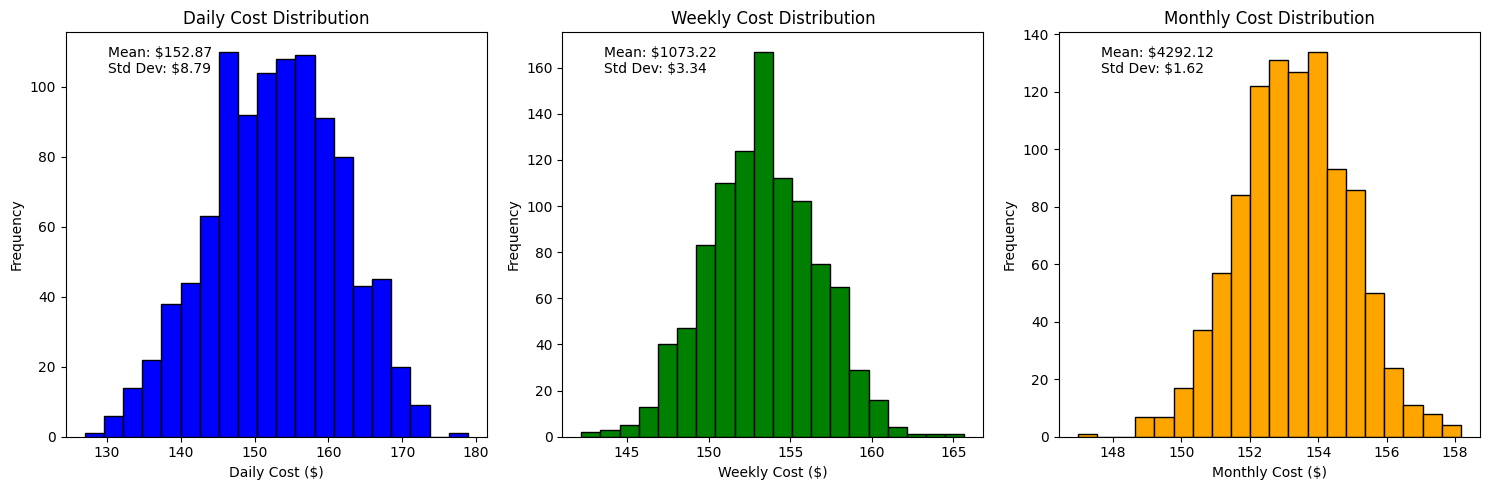

In [19]:
# Simulation usage
numSimulations = 1000
numDaysPerWeek = 7
numWeeksPerMonth = 4

# Daily simulation
dailyCosts = monteCarloSimulationDaily(numSimulations)
meanDailyCost = np.mean(dailyCosts)
stdDevDailyCost = np.std(dailyCosts)

# Weekly simulation
weeklyCosts = monteCarloSimulationWeekly(numSimulations, numDaysPerWeek)
meanWeeklyCost = np.mean(weeklyCosts) * numDaysPerWeek
stdDevWeeklyCost = np.std(weeklyCosts)

# Monthly simulation
monthlyCosts = monteCarloSimulationMonthly(numSimulations, numDaysPerWeek, numWeeksPerMonth)
meanMonthlyCost = np.mean(monthlyCosts) * numDaysPerWeek * numWeeksPerMonth
stdDevMonthlyCost = np.std(monthlyCosts)

# Display results using the function
displayResultsWithPlots(meanDailyCost, stdDevDailyCost, meanWeeklyCost, stdDevWeeklyCost, 
                        meanMonthlyCost, stdDevMonthlyCost, dailyCosts, weeklyCosts, monthlyCosts)